## Imports

In [1]:
import numpy as np
import pandas as pd
import math
import os

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVC

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## Loading Dataframes

In [2]:
wine_df = pd.read_csv("Data/wine_full_train.csv")
holdout_df = pd.read_csv("Data/holdout_df.csv")
submission_df = pd.read_csv("Data/submission_df.csv")

In [3]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0


## Train and Test Sets

In [4]:
y = wine_df["quality"]
X = wine_df.drop(columns="quality")

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=26)

## Scaling Data

In [6]:
scalar = StandardScaler()

In [7]:
# Scaling Train
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)

# Scaling Test
X_test = pd.DataFrame(scalar.fit_transform(X_test), columns=X_train.columns)

In [8]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.581284,0.891707,0.270926,-0.233546,-0.412616,1.816022,1.726431,-0.233242,0.093988,-0.871479,-0.855235
1,0.985665,-0.275337,-0.141703,0.096680,0.340001,-0.270610,-0.434992,1.719649,-0.232521,-0.575507,-0.382955
2,-0.755390,-0.442058,0.374083,0.096680,-0.116130,0.013931,0.765799,0.658295,1.530628,-0.338729,-0.855235
3,3.016896,0.002531,2.695118,1.483629,0.750520,0.677859,0.915897,2.674868,-0.885540,0.667576,2.450727
4,1.740122,-0.886646,1.199340,-0.497727,0.066322,0.393318,0.015305,0.308049,-1.081445,-0.516313,0.089326


In [9]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.700856,-0.515201,0.764214,2.536913,-0.331203,1.295750,2.799125,0.367964,0.749044,0.325382,0.052693
1,-0.760613,0.857914,-1.022356,0.017099,0.010939,-0.064545,-0.825486,-0.490799,0.496506,-0.333223,0.827515
2,-0.641100,1.623691,-1.379670,-0.402870,1.232875,-1.133347,-1.161098,-0.295132,0.559641,-0.772293,-0.431572
3,-0.043537,-0.937698,0.304811,-0.066895,-0.233448,-0.453200,0.047106,-0.344049,-0.197971,0.819336,0.536957
4,-0.641100,0.699478,-1.226535,-0.150889,-0.200863,0.032619,1.355993,0.438621,1.443521,-0.497874,-0.722130


# Models

## Logistic Regression

In [10]:
log_clf = LogisticRegression(random_state=26)

In [11]:
log_clf.fit(X_train, y_train)
log_clf.score(X_train, y_train)

0.7553571428571428

In [12]:
cross_val_score(log_clf, X_train, y_train.values.ravel(), cv=10).mean()

0.7482142857142857

## Graphing Feature Importance

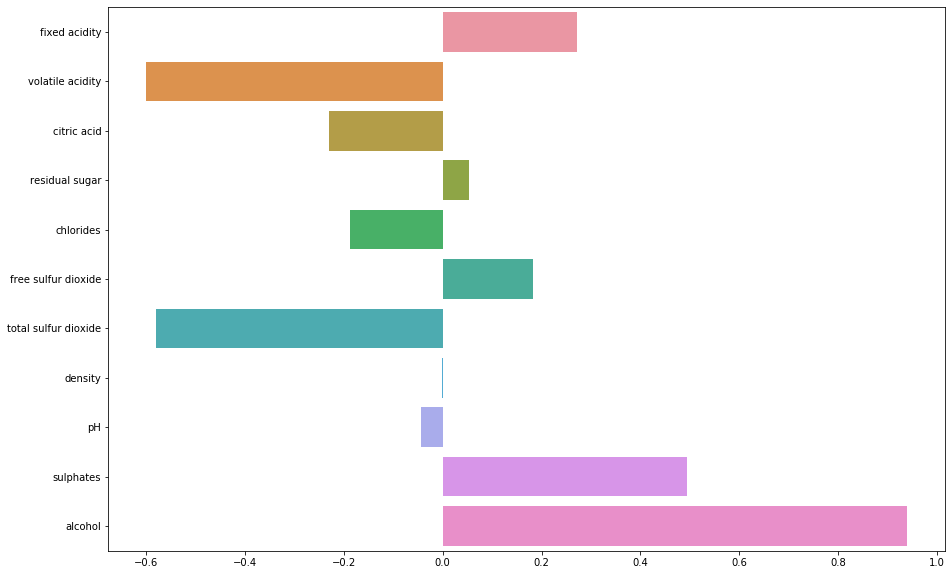

In [13]:
plt.figure(figsize=(15, 10))
sns.barplot(x=log_clf.coef_.reshape(-1), y=X_train.columns)
plt.show()

## Random Forest

In [14]:
rf_clf = RandomForestClassifier(random_state=42)

In [15]:
cross_val_score(rf_clf, X_train, y_train.values.ravel(), cv=10).mean()

0.8035714285714286

In [16]:
rf_clf.fit(X_train, y_train)
print("Train Score", rf_clf.score(X_train, y_train))
print("Test Score", rf_clf.score(X_test, y_test))

Train Score 1.0
Test Score 0.7642857142857142


## Graphing Features

In [17]:
rf_clf.feature_importances_

array([0.06759324, 0.1105057 , 0.06734258, 0.05805863, 0.06780334,
       0.05871689, 0.10427675, 0.08386274, 0.06512019, 0.12665102,
       0.19006893])

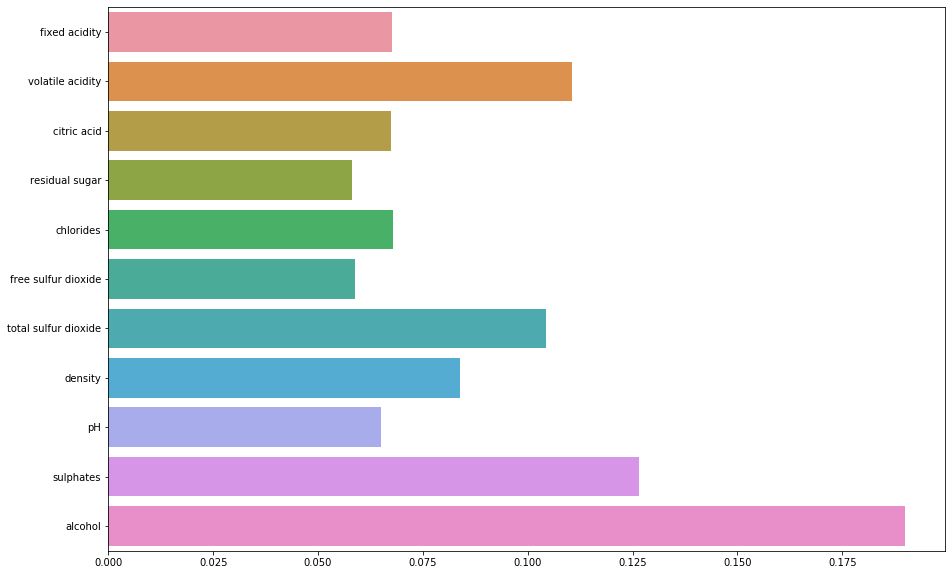

In [18]:
plt.figure(figsize=(15, 10))
sns.barplot(x=rf_clf.feature_importances_, y=X_train.columns)
plt.show()

## Gradient Boost

In [19]:
gbc = GradientBoostingClassifier(random_state=26)

In [20]:
cross_val_score(gbc, X_train, y_train.values.ravel(), cv=10).mean()

0.7839285714285715

## SVM

In [21]:
svm_clf = SVC(random_state=26)

In [22]:
cross_val_score(svm_clf, X_train, y_train.values.ravel(), cv=10).mean()

0.7651785714285715

## Observation on Models
Random Forest Models performs the best

## PCA
The challenge was to use 3 features from the data.

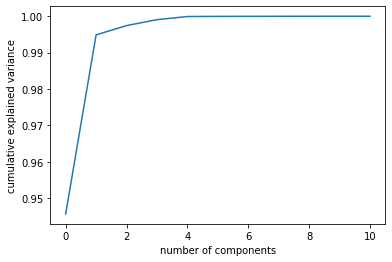

In [23]:
# Create PCA on Independent variables
pca = PCA(n_components=11).fit(X)
principalComponents = pca.fit_transform(X)
_ = [f'PC{_}' for _ in range(1, 12)]
X_pca = pd.DataFrame(data=principalComponents, columns=_)

# Graphing
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

# Choosing 3 Features
alchol, sulfate, vol acid.

In [24]:
short_wine_df = wine_df[["sulphates", "volatile acidity", "alcohol", "quality"]]

In [25]:
short_wine_df.head()

,sulphates,volatile acidity,alcohol,quality
1,0.68,0.88,9.8,0
3,0.58,0.28,9.8,1
4,0.56,0.70,9.4,0
5,0.56,0.66,9.4,0
6,0.46,0.60,9.4,0


## Train and Test Sets

In [26]:
y = short_wine_df["quality"]
X = short_wine_df.drop(columns="quality")

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling Data

In [28]:
scalar = StandardScaler()

In [29]:
X_train = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)

In [30]:
X_train.head()

,sulphates,volatile acidity,alcohol
0,-1.343691,0.314433,-1.055410
1,0.611366,0.593376,-0.960922
2,0.668868,-0.131875,-0.866434
3,1.818902,0.816530,-0.488482
4,-0.538668,2.880706,0.550884


# Models

## Logistic Regression

In [31]:
log_clf = LogisticRegression(random_state=42)

In [32]:
log_clf.fit(X_train, y_train)
log_clf.score(X_train, y_train)

0.7276785714285714

In [33]:
cross_val_score(log_clf, X_train, y_train.values.ravel(), cv=10).mean()

0.7276785714285714

## Random Forest

In [34]:
rf_clf = RandomForestClassifier(random_state=42)

In [35]:
cross_val_score(rf_clf, X_train, y_train.values.ravel(), cv=10)

array([0.82142857, 0.82142857, 0.74107143, 0.70535714, 0.77678571,
       0.71428571, 0.78571429, 0.73214286, 0.76785714, 0.72321429])

In [36]:
rf_clf.fit(X_train, y_train)
print("Train Score:", rf_clf.score(X_train, y_train))
print("Test Score:", rf_clf.score(X_test, y_test))

Train Score: 0.9964285714285714
Test Score: 0.5107142857142857


## Gradient Boost

In [37]:
gbc = GradientBoostingClassifier(random_state=42)

In [38]:
cross_val_score(gbc, X_train, y_train.values.ravel(), cv=10).mean()

0.7366071428571429

## SVM

In [39]:
svm_clf = SVC(random_state=42)

In [40]:
cross_val_score(svm_clf, X_train, y_train.values.ravel(), cv=10).mean()

0.7401785714285715

## Model Observation
The model that performed the best was Random Forest at a 99% accuracy score.

Although the train score was great, the test score did very poorly, showing that our model is not general and stuck to the training data.

Would like to dig further to see what drove the model to that score

## Test Data

In [41]:
holdout_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1363,8.0,0.830,0.27,2.0,0.080,11.0,63.0,0.99652,3.29,0.48,9.8
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
739,9.0,0.690,0.00,2.4,0.088,19.0,38.0,0.99900,3.35,0.60,9.3
1366,7.3,0.740,0.08,1.7,0.094,10.0,45.0,0.99576,3.24,0.50,9.8
901,7.4,0.635,0.10,2.4,0.080,16.0,33.0,0.99736,3.58,0.69,10.8


In [42]:
holdout_df.shape

(199, 11)

## Test

In [43]:
X_test_hold = holdout_df[["sulphates", "volatile acidity", "alcohol"]]

## Scaling Data

In [44]:
# Scaling Data
X_test_hold = pd.DataFrame(scalar.fit_transform(X_test_hold), columns=X_test_hold.columns)

In [45]:
X_test_hold.head()

,sulphates,volatile acidity,alcohol
0,-1.175599,1.982842,-0.604123
1,-0.652380,1.155352,-0.954364
2,-0.390771,1.091699,-1.041925
3,-1.044794,1.409964,-0.604123
4,0.197850,0.741607,0.271481


In [46]:
# Shape of the hold data X_test and the wine data X and y tests
X_test_hold.shape, X_test.shape, y_test.shape

((199, 3), (280, 3), (280,))

The hold test data doesn't match the shape of the y_test data. 

Will need to cut a few rows off of y_test

In [47]:
# Taking off rows to match with the new test data
y_test_hold = y_test.drop(index=y_test.index[:-199])  # Mathcing the number of rows

## Random Forest

In [48]:
rf_clf = RandomForestClassifier(random_state=53)

In [49]:
rf_clf.fit(X_train, y_train)
rf_clf.score(X_test_hold, y_test_hold)

0.4623115577889447

## Observation
The model is not generalized and is overfitting